## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [34]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

jet = cv2.imread('jet.bmp')
jet.shape

(512, 512, 3)

In [35]:
if np.all(jet[:, :, 0] == jet[:, :, 1]) and np.all(jet[:, :, 1] == jet[:, :, 2]):
    jet = jet[:, :, 0]  # Use only one channel, since all are identical

jet_shape = jet.shape
jet_shape

(512, 512)

In [36]:
def draw_histogram(img):
    fig, axs = plt.subplots(1, 2)

    fig.set_size_inches(20, 10)

    axs[0].imshow(img, 'gray', vmin=0, vmax=256)
    axs[0].axis('off')

    H = cv2.calcHist([img], [0], None, [256], [0, 256])
    H_acc = np.cumsum(H)

    axs[1].plot(H / np.max(H), c='blue')
    axs[1].plot(H_acc / np.max(H_acc), c='red')
    axs[1].grid()
    
    plt.show()

In [37]:
def histogram_BBHE(img):
    lm = int(np.median(img)) # image split threshold, could be "mean", but "median" gives better contrast
    
    H = cv2.calcHist([img], [0], None, [255], [0, 255])
    
    H_acc_lower = np.cumsum(H[:lm+1]) # C1
    H_acc_upper = np.cumsum(H[lm+1:]) # C2
    
    H_acc_lower /= np.max(H_acc_lower) # normalization
    H_acc_upper /= np.max(H_acc_upper) # normalization
    
    lower_LUT = H_acc_lower * lm # C1 LUT table
    upper_LUT = lm + 1 + (255 - lm - 1) * H_acc_upper # C2 LUT table
    
    LUT = np.concatenate((lower_LUT, upper_LUT)).astype(np.uint8) # concatenation of 2 parts of table
    
    return LUT[img]

HE equalization


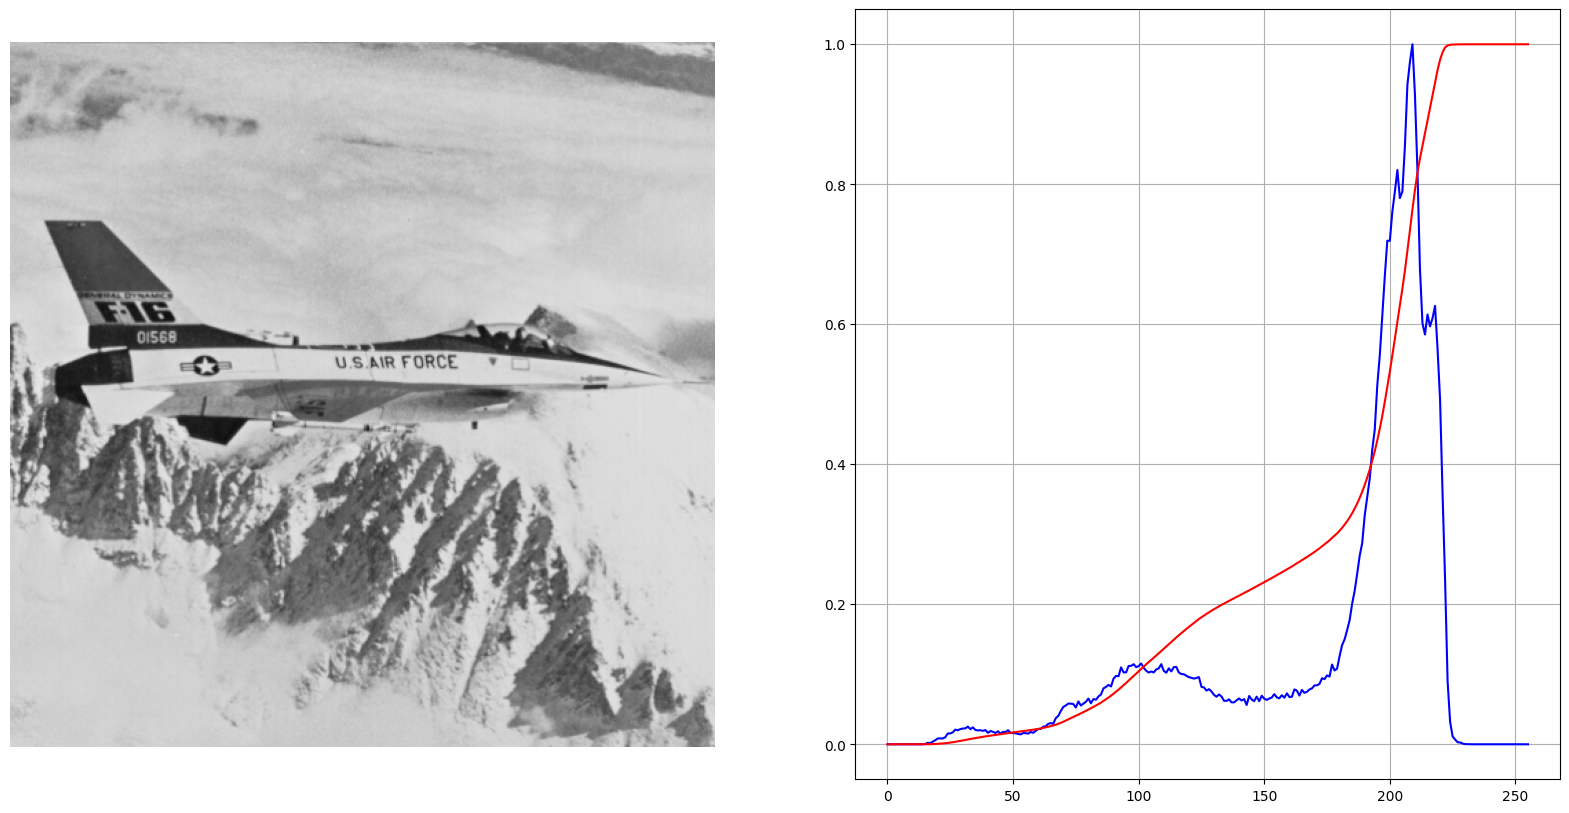

BBHE equalization


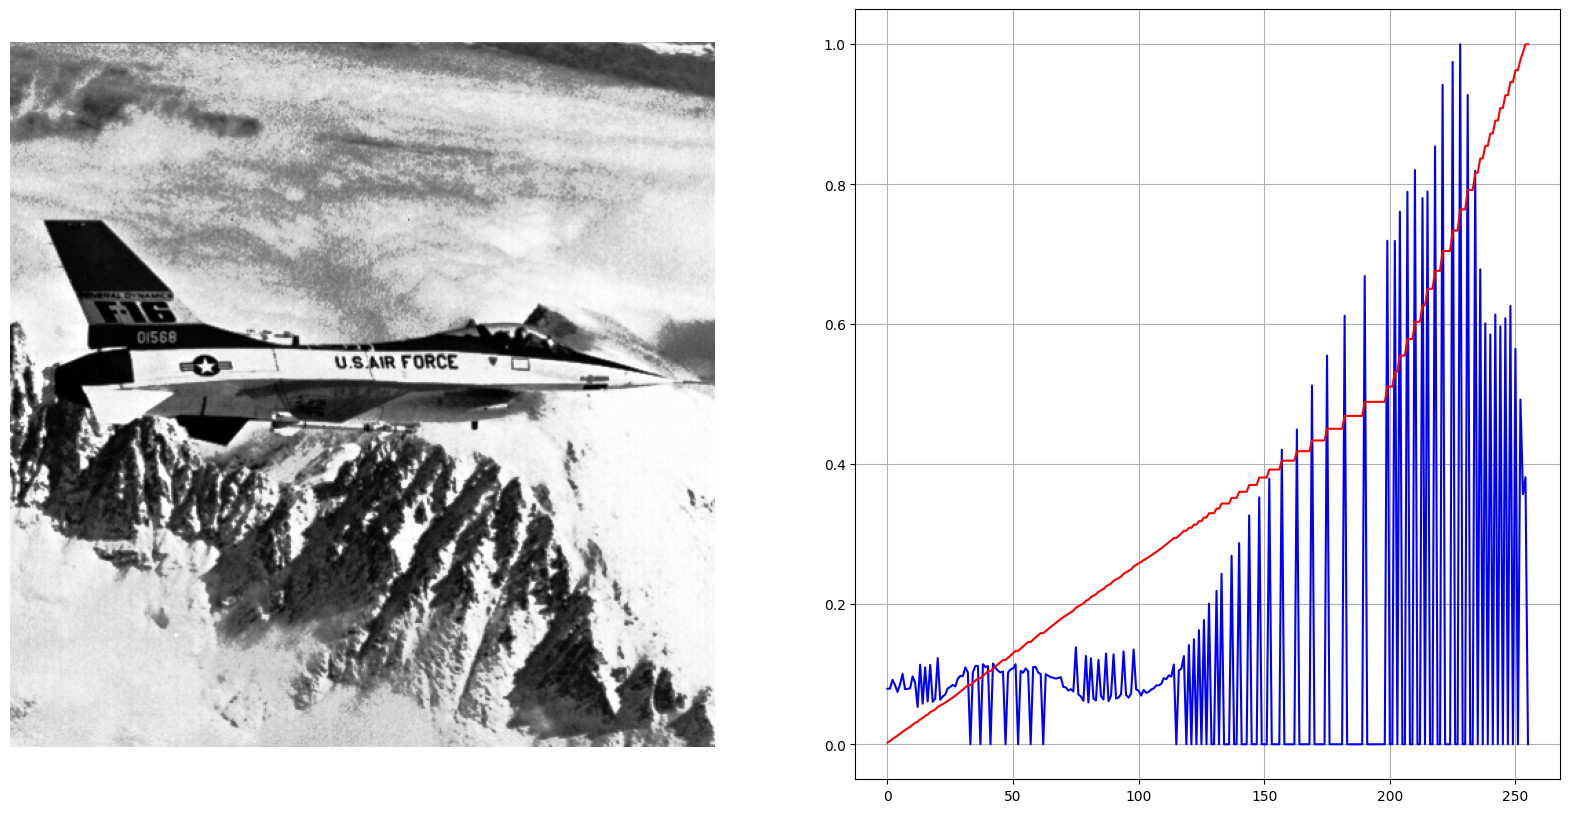

In [38]:
print("HE equalization")
draw_histogram(jet)

print("BBHE equalization")
draw_histogram(histogram_BBHE(jet))